# Age map

Plot stream width vs $T_\mathrm{J}$ vs stream age using stream simulations based on Granvik et al.'s model.

In [21]:
%matplotlib inline 

import matplotlib.pyplot as plt, numpy as np
from matplotlib.ticker import FormatStrFormatter
from scipy.interpolate import griddata
import scipy.ndimage

plt.rc('font', family='serif')
plt.rc('text', usetex=True)

/home/qye/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [22]:
import glob

fa = glob.glob('../data/sim_granvik_model/S058a*/*.int.AgeWidthTj')
fb = glob.glob('../data/sim_granvik_model/S058b*/*.int.AgeWidthTj')

In [23]:
da = np.array([[np.inf, np.inf, np.inf, np.inf, np.inf, np.inf]])
# age [yr], stream width [deg], normalized stream width [deg], i, Tj, # of particles

for fi in fa:
    t = np.loadtxt(fi)
    if np.size(t) > 6:
        da = np.append(da, t, axis=0)
    
da = da[1:].T

db = np.array([[np.inf, np.inf, np.inf, np.inf, np.inf, np.inf]])
# age [yr], stream width [deg], normalized stream width [deg], i, Tj, # of particles

for fi in fb:
    t = np.loadtxt(fi)
    if np.size(t) > 6:
        db = np.append(db, t, axis=0)
    
db = db[1:].T

/home/qye/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: loadtxt: Empty input file: "../data/sim_granvik_model/S058a5_met-pos_2451910.5_to_6103680.0/S058a5_met-pos_2451545.0_2451910.5_6103680.0_0.0005_0.05_400._-3.6_179.9.int.AgeWidthTj"
  """
/home/qye/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:15: UserWarning: loadtxt: Empty input file: "../data/sim_granvik_model/S058b5_met-pos_2451910.5_to_6103680.0/S058b5_met-pos_2451545.0_2451910.5_6103680.0_0.0005_0.05_1._-3.6_179.9.int.AgeWidthTj"
  from ipykernel import kernelapp as app


## Cometary ejection model

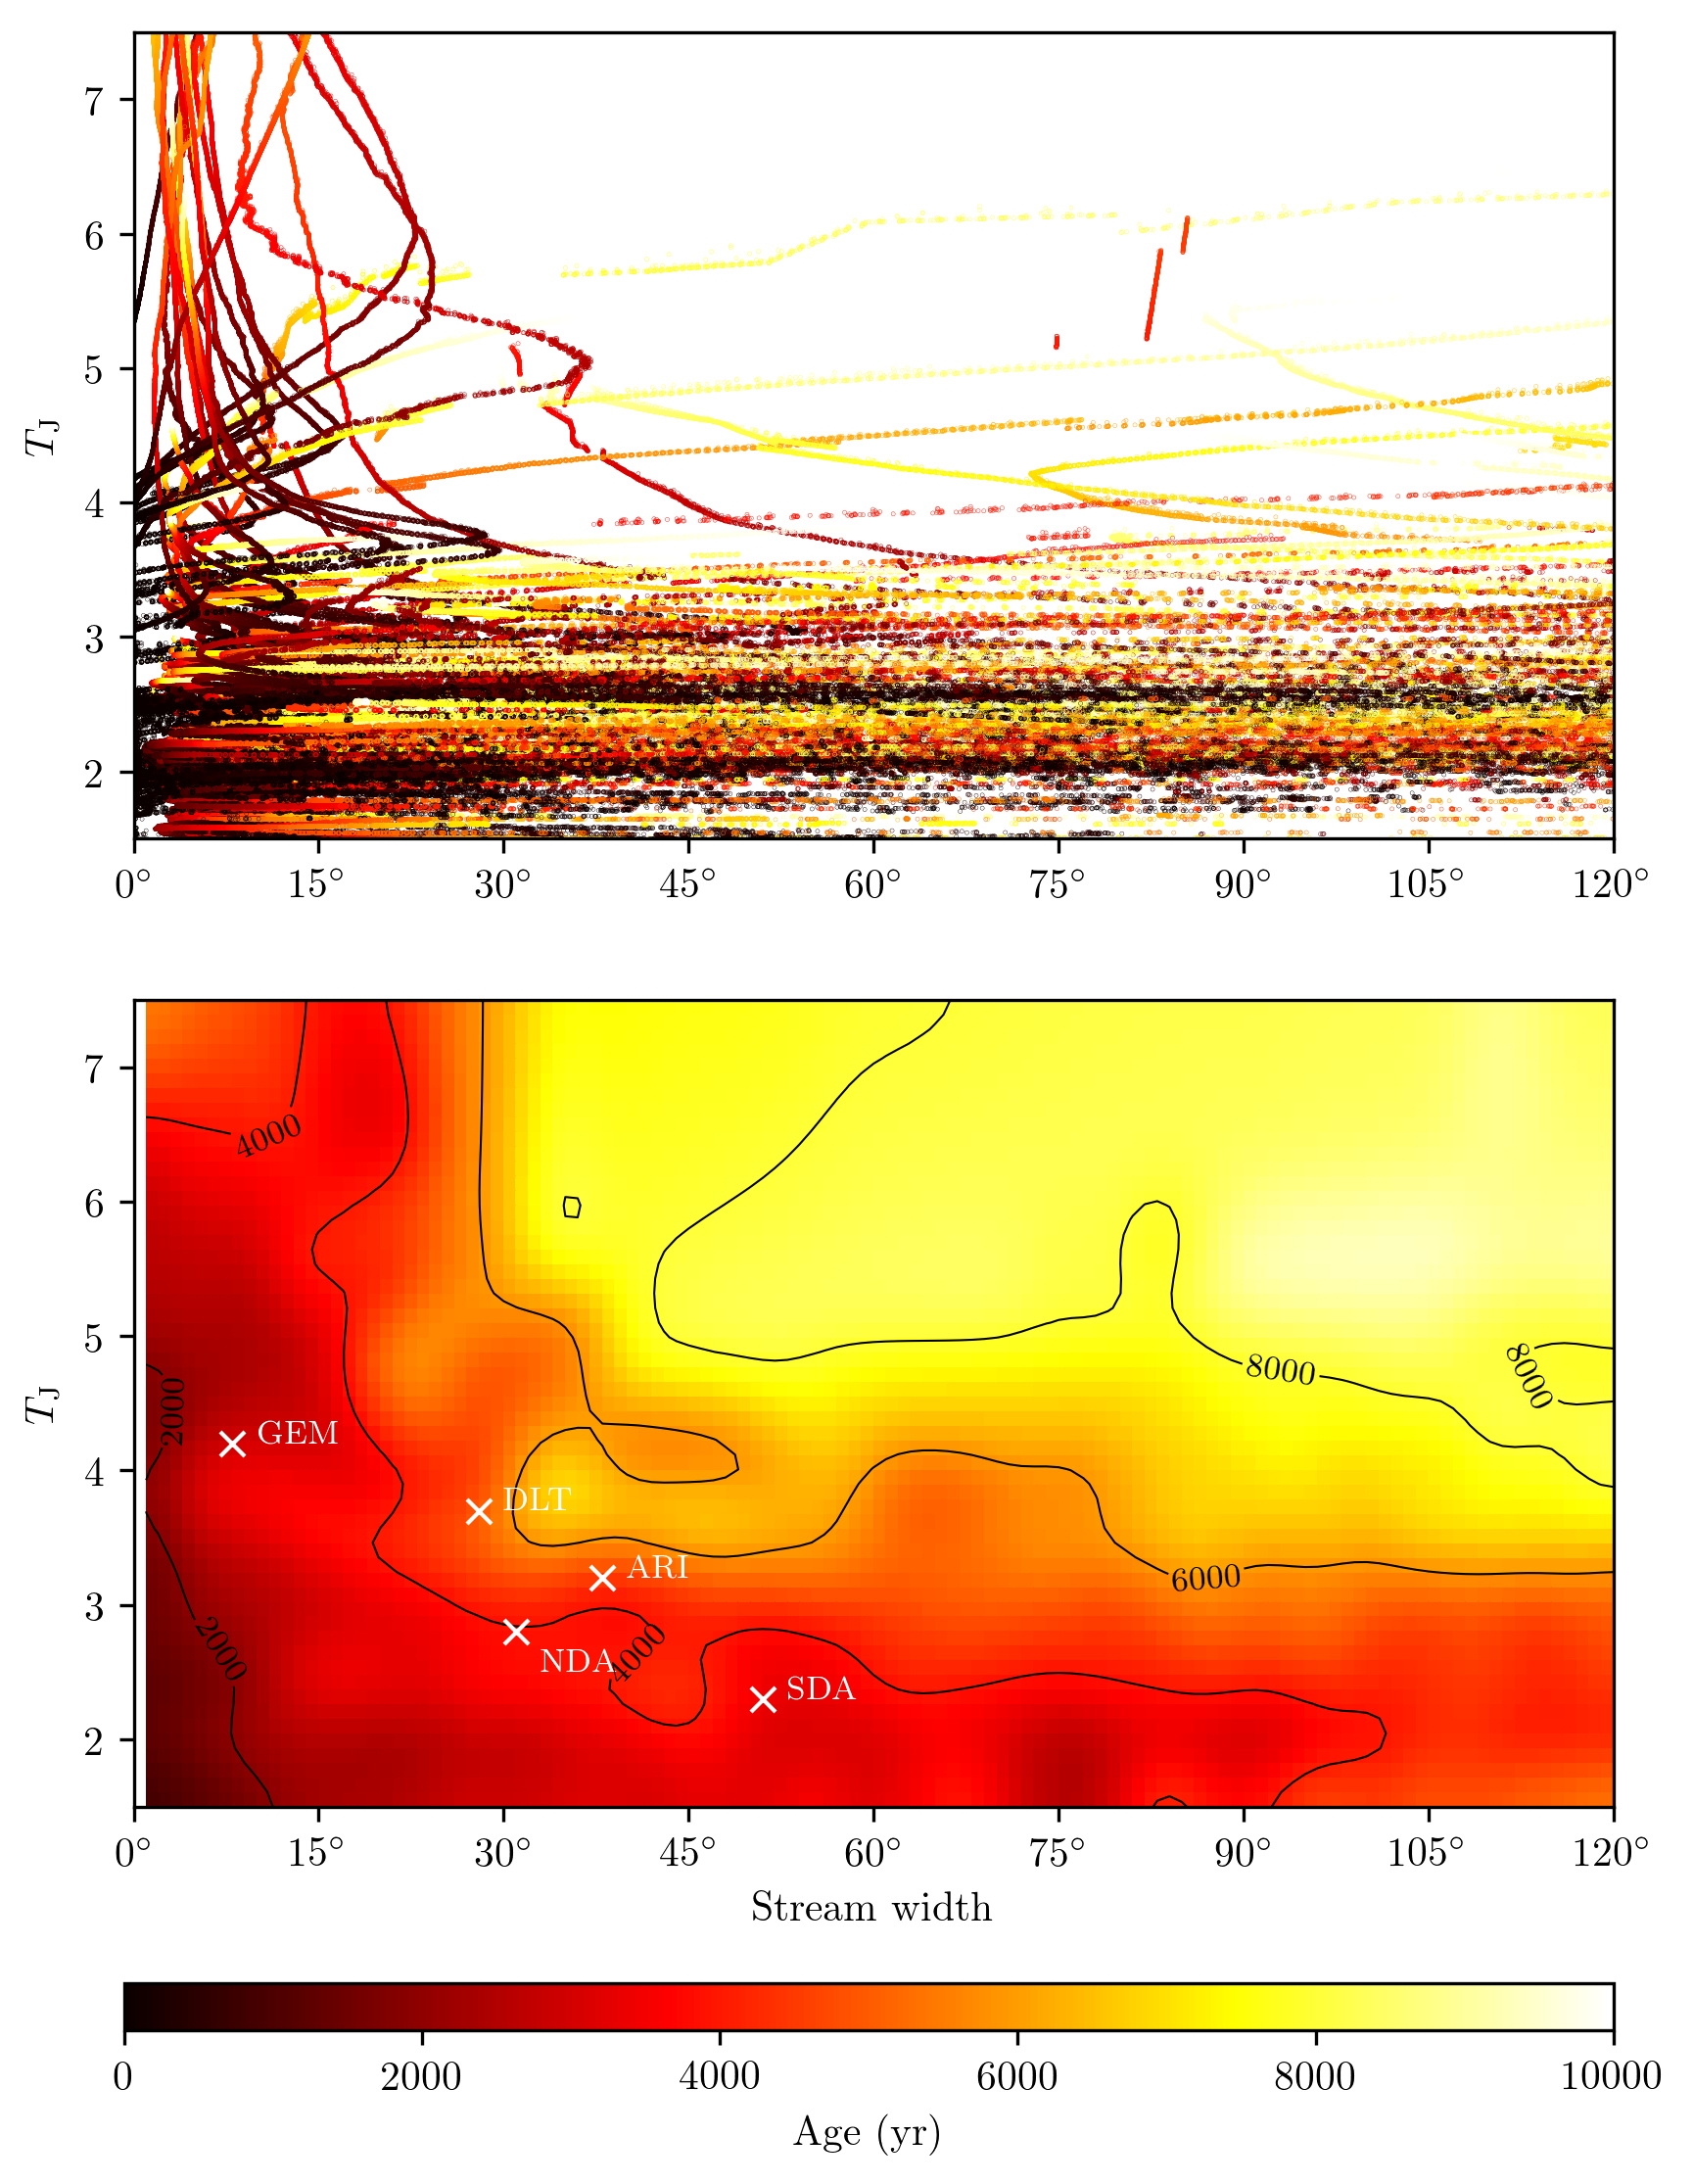

In [27]:
fig = plt.figure(figsize=(6.5, 8), dpi=300)

# left panel

ax = fig.add_subplot(211)

cs = ax.scatter(da[1], da[4], c=da[0], s=0.01, cmap='hot', rasterized=True)  
    
ax.xaxis.set_major_formatter(FormatStrFormatter(r'%i$^\circ$'))
ax.set_ylabel(r'$T_\mathrm{J}$')
#plt.colorbar(cs)

ax.set_xlim([0, 120])
ax.set_xticks(np.arange(0, 121, 15))
ax.set_ylim([1.5, 7.5])

# right panel

ax = fig.add_subplot(212)

xi, yi = np.mgrid[1:120:120j, 1.5:7.5:56j]
zi = griddata(np.array([da[1], da[4]]).T, da[0], (xi, yi))

zi2 = scipy.ndimage.gaussian_filter(zi, sigma=3.0)

CS = ax.contour(xi, yi, zi2, [2000,4000,6000,8000], linewidths=0.5, colors='k')
ax.clabel(CS, inline=1, fontsize=8, fmt='%i')
CS = ax.pcolormesh(xi, yi, zi2, vmin=0, vmax=10000, cmap='hot', rasterized=True)
ax.set_xlabel('Stream width')
ax.set_ylabel(r'$T_\mathrm{J}$')
ax.xaxis.set_major_formatter(FormatStrFormatter(r'%i$^\circ$'))
ax.set_xlim([0, 120])
ax.set_xticks(np.arange(0, 121, 15))

cbar_ax = fig.add_axes([0.12, 0.03, 0.78, 0.02])
cbar = plt.colorbar(CS, cax=cbar_ax, orientation='horizontal', pad=0.15)
cbar.set_label('Age (yr)')

# showers
ax.plot(38, 3.2, 'wx')
ax.annotate('ARI', (38, 3.2), xytext=(40, 3.2), size=8, color='w')
ax.plot(28, 3.7, 'wx')
ax.annotate('DLT', (28, 3.7), xytext=(30, 3.7), size=8, color='w')
ax.plot(31, 2.8, 'wx')
ax.annotate('NDA', (31, 2.8), xytext=(33, 2.5), size=8, color='w')
ax.plot(51, 2.3, 'wx')
ax.annotate('SDA', (51, 2.3), xytext=(53, 2.3), size=8, color='w')
ax.plot(8, 4.2, 'wx')
ax.annotate('GEM', (8, 4.2), xytext=(10, 4.2), size=8, color='w')

fig.savefig('sim-width-tj-cmt.pdf', bbox_inches = 'tight')
plt.show()

## Gravivational escape model

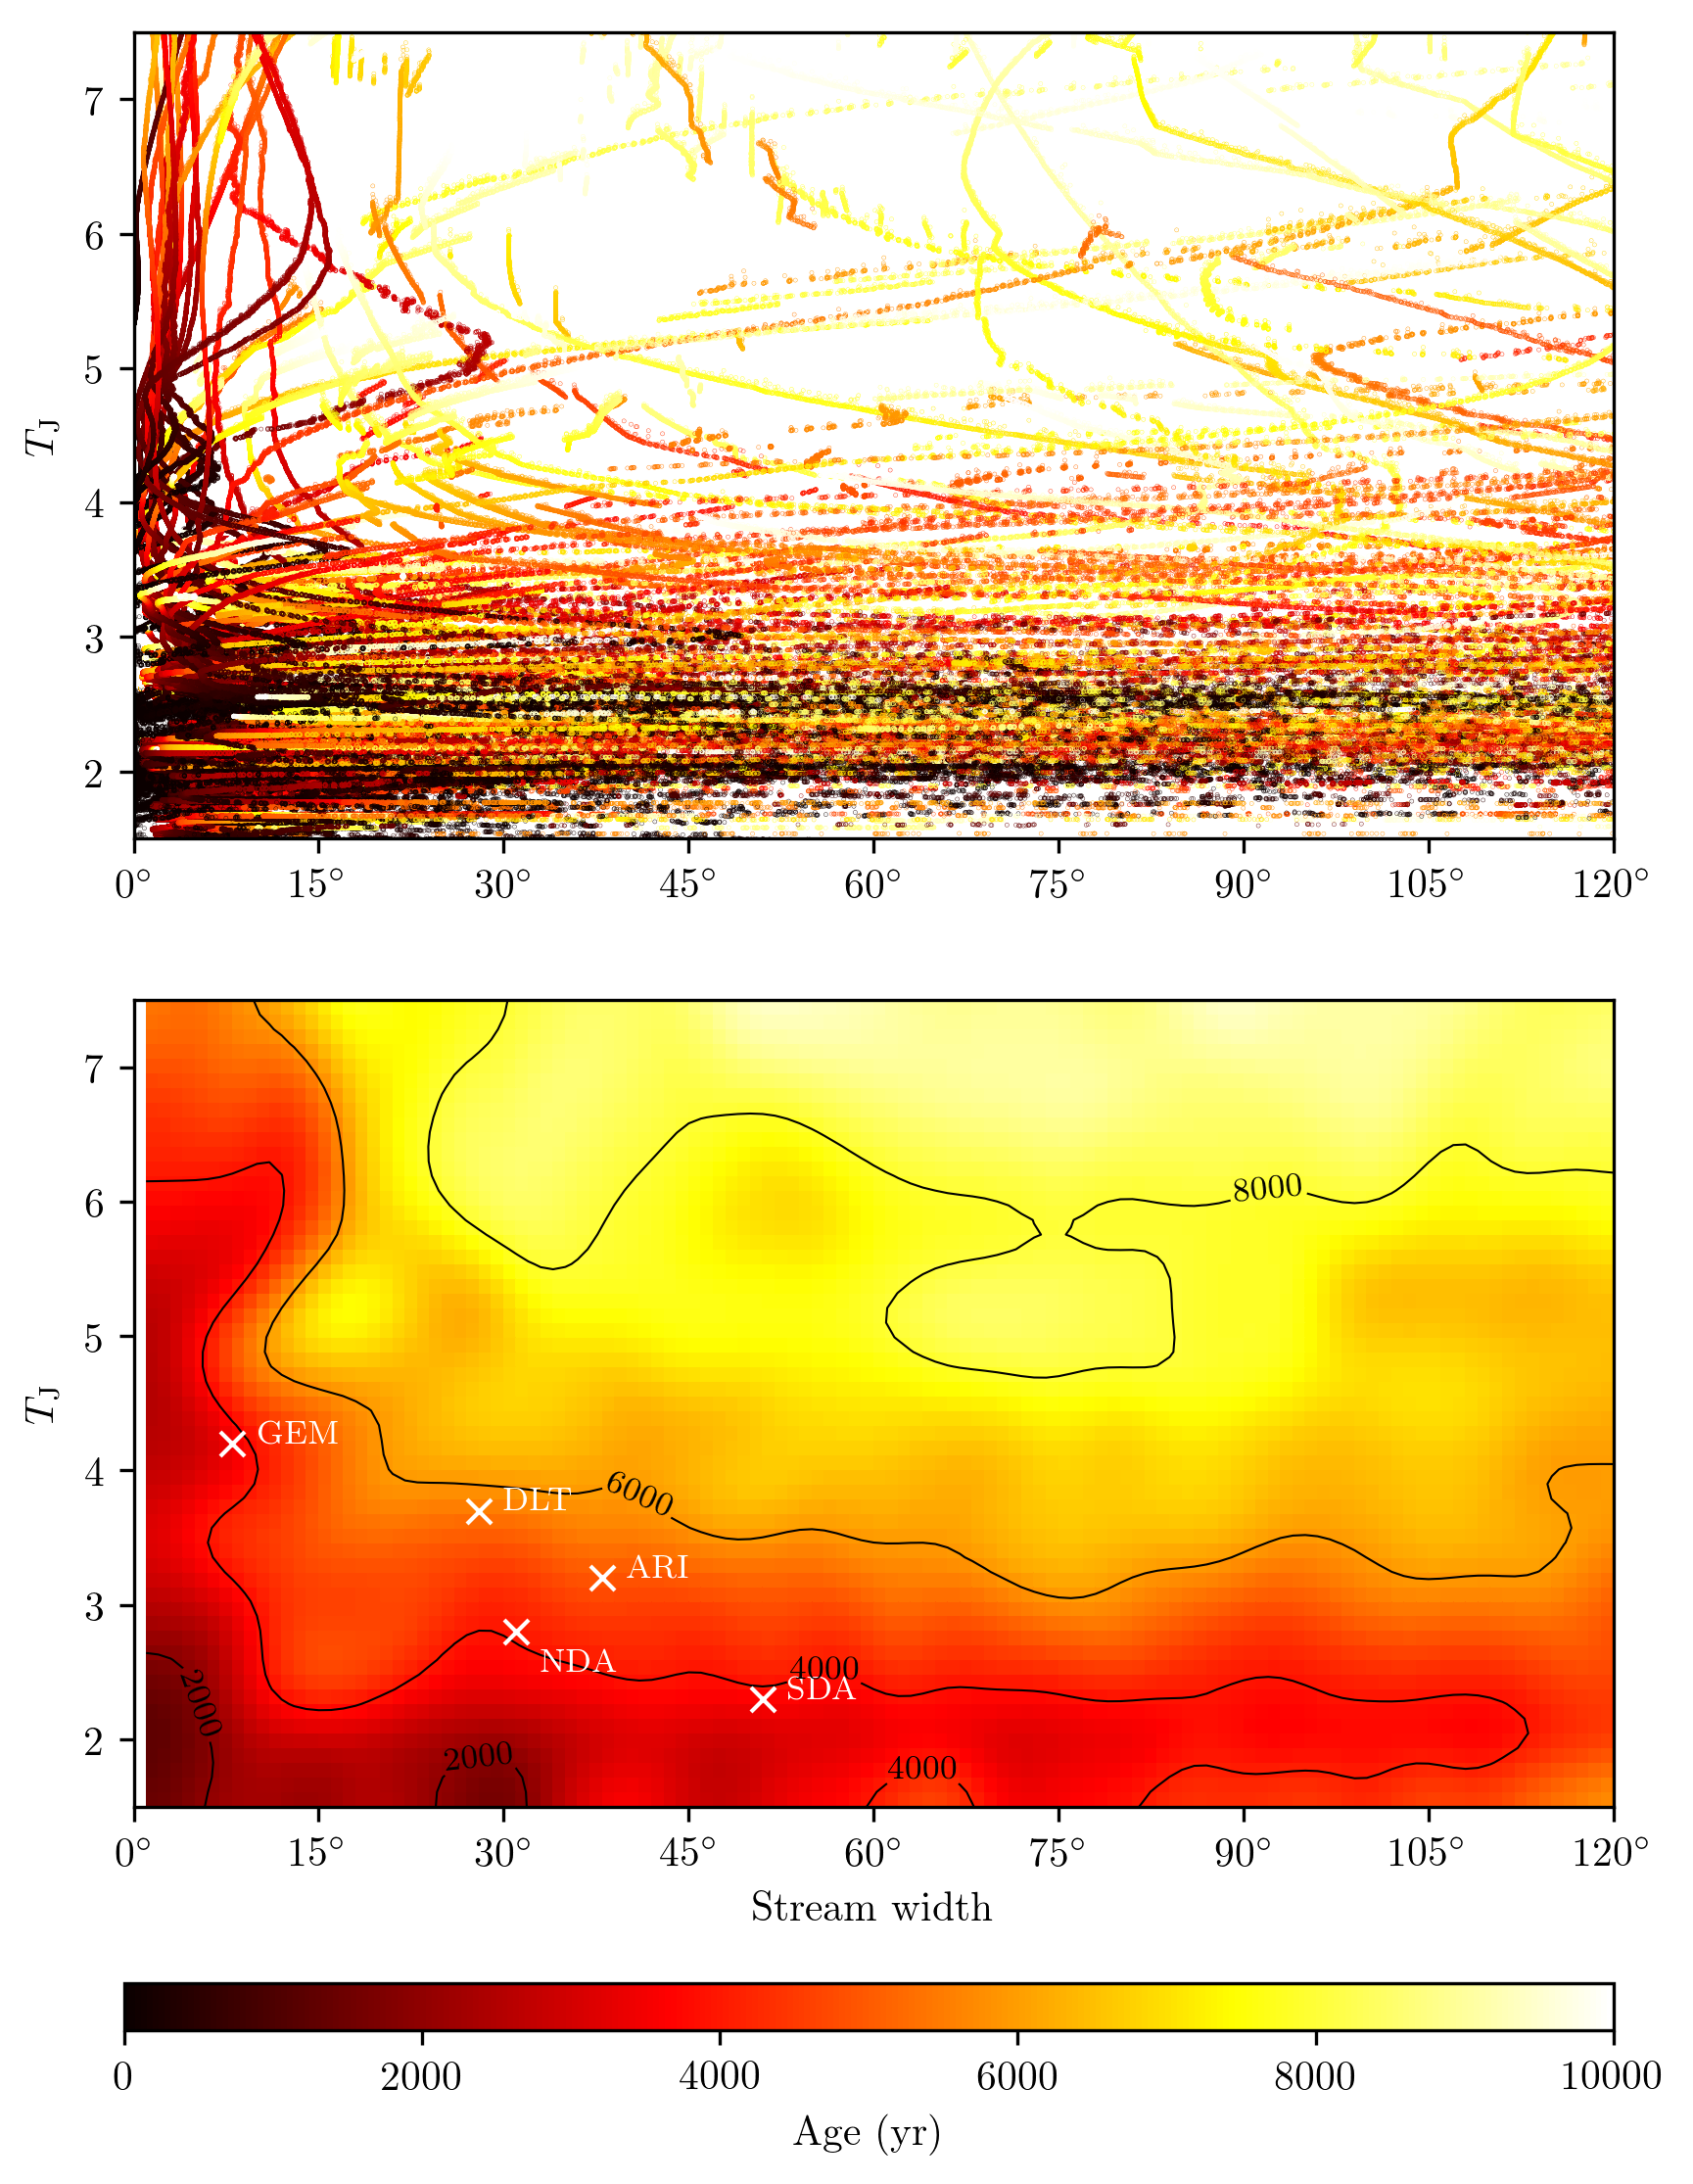

In [28]:
from scipy.interpolate import griddata
import scipy.ndimage

fig = plt.figure(figsize=(6.5, 8), dpi=300)

# upper panel

ax = fig.add_subplot(211)

cs = ax.scatter(db[1], db[4], c=db[0], s=0.01, cmap='hot', rasterized=True)  
    
ax.xaxis.set_major_formatter(FormatStrFormatter(r'%i$^\circ$'))
ax.set_ylabel(r'$T_\mathrm{J}$')
#plt.colorbar(cs)

ax.set_xlim([0, 120])
ax.set_xticks(np.arange(0, 121, 15))
ax.set_ylim([1.5, 7.5])

# lower panel

ax = fig.add_subplot(212)

xi, yi = np.mgrid[1:120:120j, 1.5:7.5:56j]
zi = griddata(np.array([db[1], db[4]]).T, db[0], (xi, yi))

zi2 = scipy.ndimage.gaussian_filter(zi, sigma=3.0)

CS = ax.contour(xi, yi, zi2, [2000,4000,6000,8000], linewidths=0.5, colors='k')
ax.clabel(CS, inline=1, fontsize=8, fmt='%i')
CS = ax.pcolormesh(xi, yi, zi2, vmin=0, vmax=10000, cmap='hot', rasterized=True)
ax.set_xlabel('Stream width')
ax.set_ylabel(r'$T_\mathrm{J}$')
ax.xaxis.set_major_formatter(FormatStrFormatter(r'%i$^\circ$'))
ax.set_xlim([0, 120])
ax.set_xticks(np.arange(0, 121, 15))

cbar_ax = fig.add_axes([0.12, 0.03, 0.78, 0.02])
cbar = plt.colorbar(CS, cax=cbar_ax, orientation='horizontal', pad=0.15)
cbar.set_label('Age (yr)')

# showers
ax.plot(38, 3.2, 'wx')
ax.annotate('ARI', (38, 3.2), xytext=(40, 3.2), size=8, color='w')
ax.plot(28, 3.7, 'wx')
ax.annotate('DLT', (28, 3.7), xytext=(30, 3.7), size=8, color='w')
ax.plot(31, 2.8, 'wx')
ax.annotate('NDA', (31, 2.8), xytext=(33, 2.5), size=8, color='w')
ax.plot(51, 2.3, 'wx')
ax.annotate('SDA', (51, 2.3), xytext=(53, 2.3), size=8, color='w')
ax.plot(8, 4.2, 'wx')
ax.annotate('GEM', (8, 4.2), xytext=(10, 4.2), size=8, color='w')

fig.savefig('sim-width-tj-grav.pdf', bbox_inches = 'tight')
plt.show()

# Age map with showers

In [40]:
import pandas as pd

shrWidthTj = pd.read_csv('../data/established_age.dat', sep='\t')

pd.DataFrame(shrWidthTj)

# shr   Tj  optical_width  radar_width  optical_age  radar_age
0    AAN  2.5           22.0           38       4000.0       4000
1    ARI  3.2           30.0           38       5000.0       5000
2    DLT  3.7           19.0           28       5500.0       5500
3    DSX  5.1           13.0           24       6000.0       7000
4    EPG  7.3           51.0            9       6000.0       9000
5    GEM  4.2           55.0           34       6500.0       7000
6    NDA  2.8           69.0           31       4000.0       5000
7    NOC  4.7           24.0           46       6500.0       7000
8    NZC  3.4           99.0           53       6000.0       6000
9    OCE  3.5            NaN           55          NaN       6000
10   SDA  2.3           42.0           51       4000.0       4000
11   SSE  2.4           21.0           37       4000.0       4000
12   SZC  4.2           62.0            5       3500.0       7000
13   THA  5.0           86.0            7       4000.0       8000

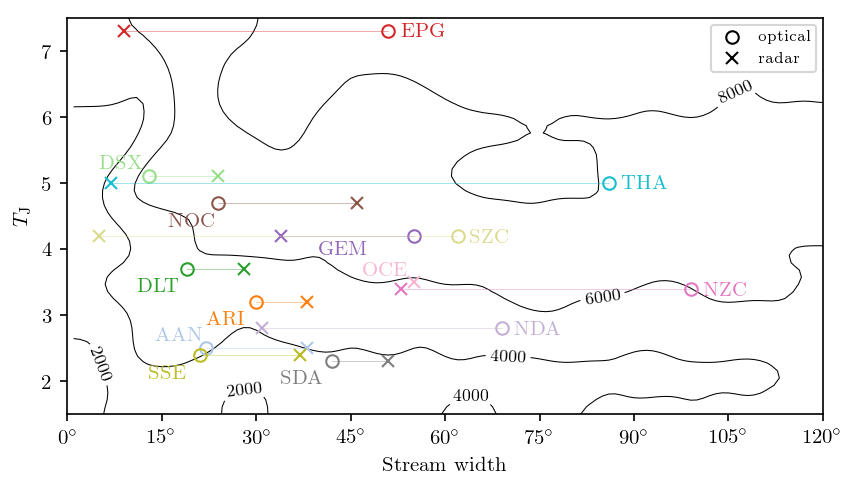

In [47]:
import matplotlib

fig = plt.figure(figsize=(6.5, 3.5), dpi=150)

ax = fig.add_subplot(111)

xi, yi = np.mgrid[1:120:120j, 1.5:7.5:56j]
zi = griddata(np.array([db[1], db[4]]).T, db[0], (xi, yi))

zi2 = scipy.ndimage.gaussian_filter(zi, sigma=3.0)

CS = ax.contour(xi, yi, zi2, [2000,4000,6000,8000], linewidths=0.5, colors='k')
ax.clabel(CS, inline=1, fontsize=8, fmt='%i')
#CS = ax.pcolormesh(xi, yi, zi2, vmin=0, vmax=10000, cmap='hot')
ax.set_xlabel('Stream width')
ax.set_ylabel(r'$T_\mathrm{J}$')
ax.xaxis.set_major_formatter(FormatStrFormatter(r'%i$^\circ$'))
ax.set_xticks(np.arange(0, 121, 15))

# showers
c = matplotlib.cm.get_cmap('tab20')
for i in list(range(14)):
    cc = c((i+1)/15)
    ax.plot(shrWidthTj['optical_width'][i], shrWidthTj['Tj'][i], 'o', fillstyle='none', color=cc)
    ax.plot(shrWidthTj['radar_width'][i], shrWidthTj['Tj'][i], 'x', color=cc)
    ax.plot([shrWidthTj['optical_width'][i], shrWidthTj['radar_width'][i]], [shrWidthTj['Tj'][i], shrWidthTj['Tj'][i]], \
            '-', color=cc, linewidth=0.25, alpha=0.75)
    #ax.plot([], [], 's', color=cc, label=shrWidthTj['# shr'][i])
    if shrWidthTj['# shr'][i] in ['GEM']:
        dx=-15
        dy=-0.3
    elif shrWidthTj['# shr'][i] in ['DLT', 'ARI', 'SSE', 'SDA', 'NOC']:
        dx=-8
        dy=-0.35
    elif shrWidthTj['# shr'][i] in ['AAN', 'DSX', 'OCE']:
        dx=-8
        dy=0.1
    else:
        dx=2
        dy=-0.1
    if shrWidthTj['# shr'][i] == 'OCE':
        ax.annotate(shrWidthTj['# shr'][i], xy=(shrWidthTj['radar_width'][i], shrWidthTj['Tj'][i]), 
                xytext=(shrWidthTj['radar_width'][i]+dx, shrWidthTj['Tj'][i]+dy), color=cc,
                )
    else:
        ax.annotate(shrWidthTj['# shr'][i], xy=(shrWidthTj['optical_width'][i], shrWidthTj['Tj'][i]), 
                xytext=(shrWidthTj['optical_width'][i]+dx, shrWidthTj['Tj'][i]+dy), color=cc,
                )

ax.plot([], [], 'o', fillstyle='none', color='k', label='optical')
ax.plot([], [], 'x', color='k', label='radar')
ax.legend(fontsize='x-small')
ax.set_xlim([0, 120])

fig.savefig('shr-age.pdf')
plt.show()

# Age map with Working List showers

Same procedure as above, except only look for working list showers. Notes:

1. edit KCA from $e=1$ to $e=0.9999$

In [31]:
import pandas as pd, numpy as np

mdc = pd.read_csv('../data/streamfulldata_working.csv', sep='\t', \
                usecols=[3,4,7,8,9,12,13,14,15,16,17,18,22,24], \
                names=['code', 'name', 'slon', 'RA', 'DEC', 'Vg', 'a', 'q', 'e', 'w', 'om', 'i', 'parent', 'tech'], \
                dtype={'status':np.int8, 'slon':np.float64, 'RA':np.float64, 'DEC':np.float64, 'Vg':np.float64, \
                      'a':np.float64, 'q':np.float64})

pd.DataFrame(mdc)

code                                      name   slon     RA   DEC     Vg  \
0   XLI  April chi Librids                          39.0  236.3 -18.9  34.20   
1   DBA  Daytime beta Andromedids                  100.5   15.0  37.5  26.00   
2   SAR  September mu Arietids                     179.5   28.5  18.6  36.30   
3   SAR  September mu Arietids                     180.2   24.3  19.0  31.20   
4   SAR  September mu Arietids                     178.3   27.1  12.5  33.70   
5   SSA  sigma Arietids                            202.0   44.7  14.2  40.50   
6   CMI  December Canis Minorids                   252.0  102.4  14.5  40.20   
7   CMI  December Canis Minorids                   255.2  104.9  13.1  37.70   
8   PHP  phi Pegasids                               54.0  358.3  20.7  30.40   
9   TOP  tau Ophiuchids                             55.0  269.3  -6.4  37.00   
10  KCT  kappa Cetids                               94.0   51.0   4.6  29.20   
11  MIC  Microscopiids                             104.0  320.3 -28.3  38.00   
12  APG  alpha Pegasids                            106.0  353.9  17.8  35.90   
13  DPL  Daytime pi Leonids                        174.0  145.6   8.7  41.70   
14  NGM  nu Geminids                               262.0   99.0  18.1  65.80   
15  BSX  beta Sextantids                           292.0  160.2   1.8  53.20   
16  AIC  August iota Cetids                        145.4  356.8  -9.6  37.24   
17  AIC  August iota Cetids                        151.0    2.0  -7.7  37.70   
18  KVI  kappa Virginids                             6.0  208.0  -8.0  37.40   
19  OLE  omicron Leonids                           296.0  144.0   7.0  41.50   
20  FAQ  15 Aquariids                              113.0  318.2  -2.1  37.70   
21  SGM  68 Geminids                               263.0  112.5  13.6  40.70   
22  AOA  August omicron Aquariids                  137.0  348.5 -14.4  38.20   
23  DRG  December rho Geminids                     262.0  113.2  32.4  39.50   
24  PCE  phi Cetids                                161.0    8.2  -5.3  36.50   
25  OLS  omega Leonids                             287.0  136.5   8.9  44.90   
26  JLL  January lambda Leonids                    288.0  140.2  23.4  38.60   
27  EPS  epsilon Scorpiids                          49.0  251.5 -31.0  39.20   
28  JEA  June epsilon Arietids                      85.0   46.7  27.1  39.10   
29  ZPI  zeta Piscids                              172.0   19.8   9.7  38.20   
30  IOL  iota Leonids                              317.0  172.2  10.1  40.40   
31  RPI  rho Piscids                               177.0   22.8  16.9  43.90   
32  FGV  February gamma Virginids                  338.0  191.1  -3.0  41.20   
33  JKL  January kappa Leonids                     287.6  141.9  21.5  39.50   
34  JTL  January theta Leonids                     311.3  165.5  12.5  40.20   
35  NMV  Northern March gamma Virginids            339.0  189.1   3.0  42.70   
36  SMV  Southern March gamma Virginids            344.0  188.1  -8.8  40.80   
37  MBE  March beta Equuleids                      359.0  320.9   5.0  45.60   
38  KCA  kappa Cancrids                            289.0  137.8   8.9  47.30   
39  OEV  October eta Virginids                     211.5  181.6  -7.5  40.70   
40  OPE  omicron Perseids                          198.1   53.5  31.5  51.70   
41  PSQ  psi3 Aquariids                            120.5  347.4 -11.9  53.10   
42  ATI  alpha Taurids                             203.3   72.4  15.2  58.10   
43  XXL  xi2 Librids                               254.4  223.0 -10.6  42.30   
44  OVI  omicron Virginids                         202.5  179.2  10.8  36.40   
45  JLC  July lambda Capricornids                  124.7  329.1  -8.5  37.30   

             a       q         e       w     om      i  \
0     1.269000  0.1010  0.999696  332.00   28.6    2.7   
1     0.599000  0.1390  0.984382    8.90  100.5   59.4   
2     1.283000  0.0680  0.947000  336.80  179.5   22.9   
3     1.17

Showers with $T_\mathrm{J}>2$:

In [32]:
def tj(a, e, i):
    return 5.2/a + 2*np.sqrt((1-e**2)*a/5.2)*np.cos(np.deg2rad(i))

tj_series = tj(mdc['a'], mdc['e'], mdc['i'])

In [33]:
shr = np.sort(pd.unique(mdc['code']))

for shri in shr:
    meanTj = round(pd.DataFrame.mean(tj_series.where(mdc['code'] == shri)), 1)
    
    if meanTj > 2:
        print(shri, meanTj)

AIC 3.1
AOA 2.7
APG 8.9
BSX 2.5
CMI 3.3
DBA 8.7
DPL 2.5
DRG 2.8
EPS 2.4
FAQ 3.0
FGV 3.7
IOL 3.5
JEA 3.8
JKL 3.3
JLC 2.5
JLL 3.2
JTL 3.3
KCT 7.2
KVI 2.6
MIC 3.4
NMV 2.4
OEV 2.4
OLE 3.2
OLS 2.3
OVI 3.8
PCE 2.8
PHP 7.2
RPI 2.9
SAR 4.6
SGM 2.6
SMV 2.9
TOP 4.5
XLI 4.1
XXL 2.7
ZPI 3.3


In [34]:
%matplotlib inline 

import matplotlib.pyplot as plt, numpy as np
from matplotlib.ticker import FormatStrFormatter

plt.rc('font', family='serif')
plt.rc('text', usetex=True)

In [35]:
import glob

fb = glob.glob('../data/sim_granvik_model/S058b*/*.int.AgeWidthTj')

In [36]:
db = np.array([[np.inf, np.inf, np.inf, np.inf, np.inf, np.inf]])
# age [yr], stream width [deg], normalized stream width [deg], i, Tj, # of particles

for fi in fb:
    t = np.loadtxt(fi)
    if np.size(t) > 6:
        db = np.append(db, t, axis=0)
    
db = db[1:].T

/home/qye/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: loadtxt: Empty input file: "../data/sim_granvik_model/S058b5_met-pos_2451910.5_to_6103680.0/S058b5_met-pos_2451545.0_2451910.5_6103680.0_0.0005_0.05_1._-3.6_179.9.int.AgeWidthTj"
  """


In [37]:
shrWidthTj = pd.read_csv('../data/working_age.dat', sep='\t')

pd.DataFrame(shrWidthTj)

# shr   Tj  optical_width  radar_width
0    AIC  3.1           36.0          NaN
1    AOA  2.7           39.0          NaN
2    APG  8.9            NaN          3.0
3    BSX  2.5            NaN          8.0
4    CMI  3.3           60.0          NaN
5    DBA  8.7            NaN          NaN
6    DPL  2.5            NaN         11.0
7    DRG  2.8            3.0          NaN
8    EPS  2.4           20.0          NaN
9    FAQ  3.0            NaN          NaN
10   FGV  3.7           18.0          NaN
11   IOL  3.5            NaN          NaN
12   JEA  3.8           29.0          NaN
13   JKL  3.3           31.0          NaN
14   JLC  2.5            8.0          NaN
15   JLL  3.2           35.0          NaN
16   JTL  3.3           25.0          NaN
17   KCT  7.2            NaN          5.0
18   KVI  2.6            NaN          NaN
19   MIC  3.4            NaN         26.0
20   NMV  2.4           71.0          NaN
21   OEV  2.4           12.0          NaN
22   OLE  3.2           87.0          NaN
23   OLS  2.3            NaN          NaN
24   OVI  3.8            7.0          NaN
25   PCE  2.8            NaN          NaN
26   PHP  7.2           16.0          NaN
27   RPI  2.9           35.0          NaN
28   SAR  4.6            NaN          NaN
29   SGM  2.6            NaN          NaN
30   SMV  2.9           77.0          NaN
31   TOP  4.5            NaN          4.0
32   XLI  4.1            NaN          NaN
33   XXL  2.7           10.0          NaN
34   ZPI  3.3           41.0          NaN

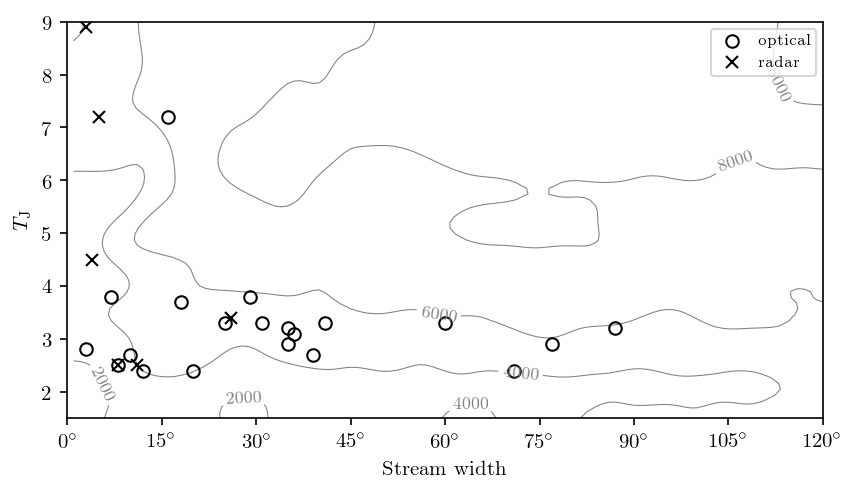

In [38]:
from scipy.interpolate import griddata
import scipy.ndimage

fig = plt.figure(figsize=(6.5, 3.5), dpi=150)

ax = fig.add_subplot(111)

xi, yi = np.mgrid[1:120:120j, 1.5:9:70j]
zi = griddata(np.array([db[1], db[4]]).T, db[0], (xi, yi))

zi2 = scipy.ndimage.gaussian_filter(zi, sigma=3.0)

CS = ax.contour(xi, yi, zi2, [2000,4000,6000,8000], linewidths=0.5, colors='gray')
ax.clabel(CS, inline=1, fontsize=8, fmt='%i')
#CS = ax.pcolormesh(xi, yi, zi2, vmin=0, vmax=10000, cmap='hot')
ax.set_xlabel('Stream width')
ax.set_ylabel(r'$T_\mathrm{J}$')
ax.xaxis.set_major_formatter(FormatStrFormatter(r'%i$^\circ$'))
ax.set_xticks(np.arange(0, 121, 15))

# showers
ax.plot(shrWidthTj['optical_width'], shrWidthTj['Tj'], 'ko', fillstyle='none', label='optical')
ax.plot(shrWidthTj['radar_width'], shrWidthTj['Tj'], 'kx', label='radar')

ax.legend(fontsize='x-small')
ax.set_xlim([0, 120])

fig.savefig('shr-age-working.pdf')
plt.show()